# KNN: Predicting Customer Class (Cars)

## Reading CSV File

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("car.data")
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preprocessing Data

In [5]:
for column in df:
    if df[column].dtype == object:
        print(column + ":", df[column].unique())

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
door: ['2' '3' '4' '5more' 'more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [7]:
from sklearn import preprocessing

for column in df:
    if df[column].dtype == object:
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column].values)

df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Defining Attributes and Label

In [8]:
predict = "class"

X = df.drop([predict], axis=1)
y = df[predict]

## Visualising Imbalance

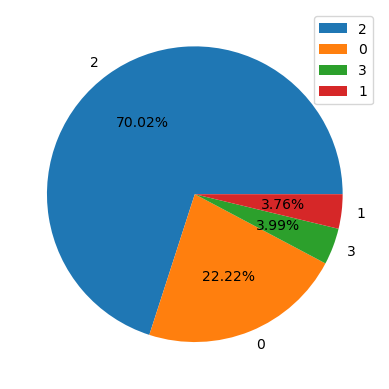

In [9]:
import matplotlib.pyplot as plt

labels = df[predict].unique()
sizes = df[predict].value_counts().values

plt.pie(sizes, labels = labels, autopct='%.2f%%')
plt.legend()
plt.show()

## Splitting Dataset into Train-Test Sets

In [10]:
from sklearn.model_selection import train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_train, columns=X_train.columns)

## Defining Appropriate Max-K Value

In [12]:
from math import sqrt, floor

max_k = floor(sqrt(len(y_test)))
if max_k % 2 == 0:
    max_k = max_k - 1

print(max_k)

17


## Training Data on Different Values of K

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

best_k = 0
best_score = 0

for n in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_scaled, y_train)

    y_hat = model.predict(X_test)

    f1 = f1_score(y_test, y_hat, average = 'weighted')

    if f1 > best_score:
        best_score = f1
        best_k = n

print(best_k, ": ", best_score)

7 :  0.9303393206527973


## Evaluating Model

In [17]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_hat, zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        77
           1       1.00      0.07      0.13        14
           2       0.85      1.00      0.92       242
           3       0.86      0.46      0.60        13

    accuracy                           0.84       346
   macro avg       0.86      0.52      0.57       346
weighted avg       0.83      0.84      0.81       346

